In [1]:
import random
import pandas as pd
import seaborn as sns
import numpy as np

In [2]:
mtcars = pd.read_csv("https://gist.githubusercontent.com/seankross/a412dfbd88b3db70b74b/raw/5f23f993cd87c283ce766e7ac6b329ee7cc2e1d1/mtcars.csv")

In [3]:
# am0 representa os carros automáticos e am1 os carros manuais
am0 = mtcars["am"] == 0
am1 = mtcars["am"] == 1

v1 =mtcars["mpg"].loc[am0].mean()
v2 = mtcars["mpg"].loc[am1].mean()

print(mtcars["mpg"].groupby(by = mtcars["am"]).mean())
abs(v1 - v2)

am
0    17.147368
1    24.392308
Name: mpg, dtype: float64


7.244939271255056

In [4]:
# aqui é feita de forma aleatória a mistura dos carros em dois grupos para verificar se a diferença de consumo de combustível é significativa ou não
# é usado a técnica de bootstrap para criar mais cenários e garantir uma análise mais precisa
resultados = []
for i in range(100000):
  x = []
  y = []
  z = mtcars["mpg"].tolist()
  amostra = random.sample(z, k = 32)
  for k in amostra:
    if len(x) >= 19:
      y.append(k)
    if len(x) < 19:
      x.append(k)
  z = abs(sum(x)/19 - sum(y)/13)
  resultados.append(z)

4.226315789473681

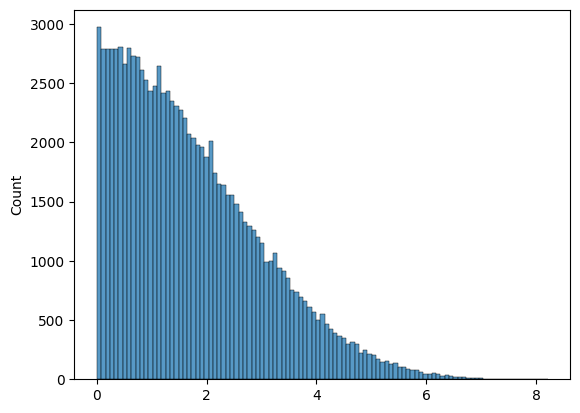

In [5]:
sns.histplot(resultados)
np.quantile(resultados, 0.95)

Realizando o teste de hipótese com significância igual 5%, isso é verificando se a diferença entre as médias de gasto de combustível é significativa o suficiente para dizer que o tipo de transmissão tem correlação com o gasto de combustível e a significância igual a 5% por cento indica que iremos acreditar que o gasto de combustível de carros manuais e automáticos são semelhantes se a diferença aferida, 7.24, for igual o menor que o quantil 0.95 e iremos acreditar que o consumo é diferente caso a diferença aferida seja maior que o quantil, nesse exemplo é possível ver que o valor que representa o quantil 0.95, o valor que está acima de 95% dos valores verificados, é inferior ao valor da diferença absoluta entre a quantidade de milha por galão média de cada tipo de transmissão, o valor do quantil está proximo de 4.2 e a diferença foi 7.24, levando-nos a creer que a diferença é grande o suficiente para nos permitir dizer que há relação entre o tipo de transmissão e o quanto ele gasta de gasolina, sendo os carros manuais mais econômicos que os automáticos.